# 掼蛋逢人配理牌

- 作者：AFAN
- 时间：2024-09-03
- 微信：afan-life
- 邮箱：fcncassandra@gmail.com
- B站/知识星球：AFAN的金融科技
- 协议：CC-BY 4.0 引用请注明来源：https://github.com/AFAN-LIFE/awesome-guandan

## 传统理牌函数

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
suits = ['♠', '♥', '♣', '♦']  # 黑桃, 红心, 梅花, 方片
ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']

In [3]:
# 创建一副牌
deck = [f'{rank}{suit}' for suit in suits for rank in ranks]
deck += ['BJ', 'RJ']  # 加入两张王

In [4]:
# 洗牌发牌，每人27张（掼蛋通常4人）
# 上一个视频中的代码这块有点问题，这里修复了
def deal(deck, seed):
    random.seed(seed)
    two_decks = deck + deck
    random.shuffle(two_decks)
    return [two_decks[i::4] for i in range(4)]

In [5]:
def trans_hand_into_df(hand):
    df = pd.DataFrame(columns=['♠', '♥', '♣', '♦', 'sum'], data=0,
             index=['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A', 'BJ', 'RJ'])
    for i in hand:
        if i == 'BJ':
            df.loc['BJ', 'sum'] += 1
        elif i == 'RJ':
            df.loc['RJ', 'sum'] += 1
        else:
            df.loc[i[:-1], i[-1]] += 1
    df['sum'] += df.loc[:, ['♠', '♥', '♣', '♦']].sum(axis=1)
    return df

In [6]:
def generate_combinations(df):
    # 单张
    one_kind_list = df[df['sum'] >= 1].index.tolist() 
    # 对子
    two_kinds_list = [i*2 for i in df[df['sum'] >= 2].index.tolist()]
    # 三张
    three_kinds_list = [i*3 for i in df[df['sum'] >= 3].index.tolist()]
    # 四张以上的炸弹
    bomb_list = [i*j for i,j in zip(df[df['sum'] >= 4].index.tolist(), 
                                    df[df['sum'] >= 4]['sum'].tolist())]
    # 三带二
    fullhouse_list =  [(i+j) for i in three_kinds_list for j in two_kinds_list if i[0] != j[0]]
    # 五张顺子
    sequence_df = df.copy()
    sequence_df = sequence_df.loc['2':'A']
    sequence_df = pd.concat([sequence_df.loc[['A']], sequence_df], axis=0)
    straight_list =  [''.join(sequence_df['sum'][i-4:i+1].index.tolist()) 
                      for i in range(4, len(sequence_df['sum'])) 
                      if (sequence_df['sum'][i-4:i+1]>0).sum()==5]
    # 钢板
    plate_list =  [''.join((sequence_df['sum'][i-1:i+1].index*3).tolist()) 
                      for i in range(1, len(sequence_df['sum'])) 
                      if (sequence_df['sum'][i-1:i+1]>2).sum()==2]
    # 三连对
    tube_list =  [''.join((sequence_df['sum'][i-2:i+1].index*2).tolist()) 
                      for i in range(2, len(sequence_df['sum'])) 
                      if (sequence_df['sum'][i-2:i+1]>1).sum()==3]
    # 同花顺
    flush_list =  [[f'{j}'.join(sequence_df[j][i-4:i+1].index.tolist()) + j 
                      for i in range(4, len(sequence_df['sum'])) 
                      if (sequence_df[j][i-4:i+1]>0).sum()==5] for j in suits ]
    return one_kind_list, two_kinds_list, three_kinds_list, bomb_list,\
           fullhouse_list, straight_list, plate_list, tube_list, flush_list

In [7]:
hand = trans_hand_into_df(deal(deck, 42)[0])

In [8]:
hand

,♠,♥,♣,♦,sum
2,1,0,0,0,1
3,0,0,1,2,3
4,0,0,0,0,0
5,0,0,0,0,0
6,0,1,1,2,4
7,1,1,1,0,3
8,1,0,0,1,2
9,0,1,0,1,2
10,0,1,0,1,2
J,0,0,0,1,1


In [9]:
generate_combinations(hand)

(['2', '3', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A', 'BJ', 'RJ'],
 ['33', '66', '77', '88', '99', '1010', 'QQ', 'AA'],
 ['333', '666', '777', 'QQQ'],
 ['6666', 'QQQQ'],
 ['33366',
  '33377',
  '33388',
  '33399',
  '3331010',
  '333QQ',
  '333AA',
  '66633',
  '66677',
  '66688',
  '66699',
  '6661010',
  '666QQ',
  '666AA',
  '77733',
  '77766',
  '77788',
  '77799',
  '7771010',
  '777QQ',
  '777AA',
  'QQQ33',
  'QQQ66',
  'QQQ77',
  'QQQ88',
  'QQQ99',
  'QQQ1010',
  'QQQAA'],
 ['678910', '78910J', '8910JQ', '910JQK', '10JQKA'],
 ['666777'],
 ['667788', '778899', '88991010'],
 [[], [], [], ['8♦9♦10♦J♦Q♦']])

## 一张逢人配

In [10]:
level_card = '2'

In [11]:
hand = trans_hand_into_df(deal(deck, 42)[0])

In [12]:
hand

,♠,♥,♣,♦,sum
2,1,0,0,0,1
3,0,0,1,2,3
4,0,0,0,0,0
5,0,0,0,0,0
6,0,1,1,2,4
7,1,1,1,0,3
8,1,0,0,1,2
9,0,1,0,1,2
10,0,1,0,1,2
J,0,0,0,1,1


In [13]:
df = hand

### 单张变化

In [14]:
# 单张，逢人配单独出是自己，所以不影响单张
one_kind_list = df[df['sum'] >= 1].index.tolist() 
one_kind_list

['2', '3', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A', 'BJ', 'RJ']

### 新的矩阵

In [15]:
new_df = df.copy()
new_df.loc['2': 'A'] = new_df.loc['2': 'A'] + 1
new_df.loc[level_card, ['♥', 'sum']] = new_df.loc[level_card, ['♥', 'sum']] - 1

In [16]:
observe_df = pd.concat([df, new_df], axis=1)
observe_df

,♠,♥,♣,♦,sum,♠,♥,♣,♦,sum
2,1,0,0,0,1,2,0,1,1,1
3,0,0,1,2,3,1,1,2,3,4
4,0,0,0,0,0,1,1,1,1,1
5,0,0,0,0,0,1,1,1,1,1
6,0,1,1,2,4,1,2,2,3,5
7,1,1,1,0,3,2,2,2,1,4
8,1,0,0,1,2,2,1,1,2,3
9,0,1,0,1,2,1,2,1,2,3
10,0,1,0,1,2,1,2,1,2,3
J,0,0,0,1,1,1,1,1,2,2


### 对子变化

In [62]:
observe_df

,♠,♥,♣,♦,sum,♠,♥,♣,♦,sum
2,1,0,0,0,1,2,0,1,1,1
3,0,0,1,2,3,1,1,2,3,4
4,0,0,0,0,0,1,1,1,1,1
5,0,0,0,0,0,1,1,1,1,1
6,0,1,1,2,4,1,2,2,3,5
7,1,1,1,0,3,2,2,2,1,4
8,1,0,0,1,2,2,1,1,2,3
9,0,1,0,1,2,1,2,1,2,3
10,0,1,0,1,2,1,2,1,2,3
J,0,0,0,1,1,1,1,1,2,2


In [17]:
# 考虑1张逢人配的对子
origin_two_kinds_list = [i*2 for i in df[df['sum'] >= 2].index.tolist()]
new_two_kinds_list = [i*2 for i in new_df[new_df['sum'] >= 2].index.tolist()]
origin_two_kinds_list, new_two_kinds_list

(['33', '66', '77', '88', '99', '1010', 'QQ', 'AA'],
 ['33', '66', '77', '88', '99', '1010', 'JJ', 'QQ', 'KK', 'AA'])

### 三张变化

In [62]:
observe_df

,♠,♥,♣,♦,sum,♠,♥,♣,♦,sum
2,1,0,0,0,1,2,0,1,1,1
3,0,0,1,2,3,1,1,2,3,4
4,0,0,0,0,0,1,1,1,1,1
5,0,0,0,0,0,1,1,1,1,1
6,0,1,1,2,4,1,2,2,3,5
7,1,1,1,0,3,2,2,2,1,4
8,1,0,0,1,2,2,1,1,2,3
9,0,1,0,1,2,1,2,1,2,3
10,0,1,0,1,2,1,2,1,2,3
J,0,0,0,1,1,1,1,1,2,2


In [18]:
# 逢人配的3张
origin_three_kinds_list = [i*3 for i in df[df['sum'] >= 3].index.tolist()]
new_three_kinds_list = [i*3 for i in new_df[new_df['sum'] >= 3].index.tolist()]
origin_three_kinds_list, new_three_kinds_list

(['333', '666', '777', 'QQQ'],
 ['333', '666', '777', '888', '999', '101010', 'QQQ', 'AAA'])

### 炸弹变化

In [62]:
observe_df

,♠,♥,♣,♦,sum,♠,♥,♣,♦,sum
2,1,0,0,0,1,2,0,1,1,1
3,0,0,1,2,3,1,1,2,3,4
4,0,0,0,0,0,1,1,1,1,1
5,0,0,0,0,0,1,1,1,1,1
6,0,1,1,2,4,1,2,2,3,5
7,1,1,1,0,3,2,2,2,1,4
8,1,0,0,1,2,2,1,1,2,3
9,0,1,0,1,2,1,2,1,2,3
10,0,1,0,1,2,1,2,1,2,3
J,0,0,0,1,1,1,1,1,2,2


In [70]:
bomb_list = [i*j for i,j in zip(df[df['sum'] >= 4].index.tolist(), 
                                    df[df['sum'] >= 4]['sum'].tolist())]
bomb_list

['6666', 'QQQQ']

之前把超过4张的都按照最大算，此处优化一下

In [77]:
df[df['sum'] >= 5].index.tolist()

[]

In [78]:
# 最多10张炸弹，为更多级牌做准备
origin_bomb_list = [i*k for k in range(4, 9+2) for i in df[df['sum'] >= k].index.tolist() ]
origin_bomb_list

['6666', 'QQQQ']

In [79]:
# 最多10张炸弹，为更多级牌做准备
new_bomb_list = [i*k for k in range(4, 9+2) for i in new_df[new_df['sum'] >= k].index.tolist() ]
new_bomb_list

['3333', '6666', '7777', 'QQQQ', '66666', 'QQQQQ']

### 增加王炸

In [84]:
# 王炸不受到逢人配影响
joker_bomb_list =  ['BJBJRJRJ'] if df.loc[['BJ', 'RJ'], 'sum'].sum() == 4 else []

### 三带二变化

In [21]:
# 原始三带二
origin_fullhouse_list =  [(i+j) for i in origin_three_kinds_list for j in origin_two_kinds_list if i[0] != j[0]]
# 考虑逢人配的可以是 2张原版+3张新版 或 2张新版+3张原版
new_fullhouse_list = [(i+j) for i in origin_three_kinds_list for j in new_two_kinds_list if i[0] != j[0]] +\
                     [(i+j) for i in new_three_kinds_list for j in origin_two_kinds_list if i[0] != j[0]]
len(origin_fullhouse_list), len(new_fullhouse_list)

(28, 92)

- (AA + BB) * AAA + (AAA + BBB) * AA = AAAAA + BBAAA + AAAAA + BBBAA 
- （A表示原版，B表示新增，这样多了一个纯原版的AAAAA）

In [22]:
# 由于新版都包含了原版，所以会多一个2张原版+3张原版的部分，需要再去个重复
new_fullhouse_list = np.unique(new_fullhouse_list).tolist()
len(origin_fullhouse_list), len(new_fullhouse_list)

(28, 64)

In [23]:
origin_fullhouse_list, new_fullhouse_list

(['33366',
  '33377',
  '33388',
  '33399',
  '3331010',
  '333QQ',
  '333AA',
  '66633',
  '66677',
  '66688',
  '66699',
  '6661010',
  '666QQ',
  '666AA',
  '77733',
  '77766',
  '77788',
  '77799',
  '7771010',
  '777QQ',
  '777AA',
  'QQQ33',
  'QQQ66',
  'QQQ77',
  'QQQ88',
  'QQQ99',
  'QQQ1010',
  'QQQAA'],
 ['10101033',
  '10101066',
  '10101077',
  '10101088',
  '10101099',
  '101010AA',
  '101010QQ',
  '3331010',
  '33366',
  '33377',
  '33388',
  '33399',
  '333AA',
  '333JJ',
  '333KK',
  '333QQ',
  '6661010',
  '66633',
  '66677',
  '66688',
  '66699',
  '666AA',
  '666JJ',
  '666KK',
  '666QQ',
  '7771010',
  '77733',
  '77766',
  '77788',
  '77799',
  '777AA',
  '777JJ',
  '777KK',
  '777QQ',
  '8881010',
  '88833',
  '88866',
  '88877',
  '88899',
  '888AA',
  '888QQ',
  '9991010',
  '99933',
  '99966',
  '99977',
  '99988',
  '999AA',
  '999QQ',
  'AAA1010',
  'AAA33',
  'AAA66',
  'AAA77',
  'AAA88',
  'AAA99',
  'AAAQQ',
  'QQQ1010',
  'QQQ33',
  'QQQ66',
  'QQQ77',

### 顺子变化

In [24]:
# 原版五张顺子
origin_sequence_df = df.copy()
origin_sequence_df = origin_sequence_df.loc['2':'A']
origin_sequence_df = pd.concat([origin_sequence_df.loc[['A']], origin_sequence_df], axis=0)
origin_straight_list =  [''.join(origin_sequence_df['sum'][i-4:i+1].index.tolist()) 
                  for i in range(4, len(origin_sequence_df['sum'])) 
                  if (origin_sequence_df['sum'][i-4:i+1]>0).sum()==5]
origin_straight_list

['678910', '78910J', '8910JQ', '910JQK', '10JQKA']

In [25]:
observe_df

,♠,♥,♣,♦,sum,♠,♥,♣,♦,sum
2,1,0,0,0,1,2,0,1,1,1
3,0,0,1,2,3,1,1,2,3,4
4,0,0,0,0,0,1,1,1,1,1
5,0,0,0,0,0,1,1,1,1,1
6,0,1,1,2,4,1,2,2,3,5
7,1,1,1,0,3,2,2,2,1,4
8,1,0,0,1,2,2,1,1,2,3
9,0,1,0,1,2,1,2,1,2,3
10,0,1,0,1,2,1,2,1,2,3
J,0,0,0,1,1,1,1,1,2,2


In [26]:
# 新版五张顺子
level_num = 1
new_sequence_df = new_df.copy()
new_sequence_df = new_sequence_df.loc['2':'A']
new_sequence_df = pd.concat([new_sequence_df.loc[['A']], new_sequence_df], axis=0)
new_straight_list =  [''.join(new_sequence_df['sum'][i-4:i+1].index.tolist()) 
                  for i in range(4, len(new_sequence_df['sum'])) 
                  if (new_sequence_df['sum'][i-4:i+1]>0).sum()==5
                  and ((origin_sequence_df['sum'][i-4:i+1]==0).sum() <= level_num)]  # 限制可用的逢人配张数
new_straight_list

['56789', '678910', '78910J', '8910JQ', '910JQK', '10JQKA']

### 钢板变化

In [27]:
# 原版钢板
origin_plate_list =  [''.join((origin_sequence_df['sum'][i-1:i+1].index*3).tolist()) 
                  for i in range(1, len(origin_sequence_df['sum'])) 
                  if (origin_sequence_df['sum'][i-1:i+1]>2).sum()==2]
origin_plate_list

['666777']

In [28]:
observe_df

,♠,♥,♣,♦,sum,♠,♥,♣,♦,sum
2,1,0,0,0,1,2,0,1,1,1
3,0,0,1,2,3,1,1,2,3,4
4,0,0,0,0,0,1,1,1,1,1
5,0,0,0,0,0,1,1,1,1,1
6,0,1,1,2,4,1,2,2,3,5
7,1,1,1,0,3,2,2,2,1,4
8,1,0,0,1,2,2,1,1,2,3
9,0,1,0,1,2,1,2,1,2,3
10,0,1,0,1,2,1,2,1,2,3
J,0,0,0,1,1,1,1,1,2,2


In [29]:
# 新版钢板  有两种情况：AAA + BXX AAX + BBX，但核心看老张数之和，注意先把超过3个的比如AAAAA -> AAA再比较
level_num = 1
new_plate_list =  [''.join((new_sequence_df['sum'][i-1:i+1].index*3).tolist()) 
                  for i in range(1, len(new_sequence_df['sum'])) 
                  if (new_sequence_df['sum'][i-1:i+1]>2).sum()==2
                  and ((origin_sequence_df['sum'][i-1:i+1].clip(upper=3)).sum() >= 6-level_num)]  # 限制可用的逢人配张数
new_plate_list

['666777', '777888']

### 三连对变化

In [30]:
# 原版三连对
origin_tube_list =  [''.join((origin_sequence_df['sum'][i-2:i+1].index*2).tolist()) 
                  for i in range(2, len(origin_sequence_df['sum'])) 
                  if (origin_sequence_df['sum'][i-2:i+1]>1).sum()==3]
origin_tube_list

['667788', '778899', '88991010']

In [31]:
observe_df

,♠,♥,♣,♦,sum,♠,♥,♣,♦,sum
2,1,0,0,0,1,2,0,1,1,1
3,0,0,1,2,3,1,1,2,3,4
4,0,0,0,0,0,1,1,1,1,1
5,0,0,0,0,0,1,1,1,1,1
6,0,1,1,2,4,1,2,2,3,5
7,1,1,1,0,3,2,2,2,1,4
8,1,0,0,1,2,2,1,1,2,3
9,0,1,0,1,2,1,2,1,2,3
10,0,1,0,1,2,1,2,1,2,3
J,0,0,0,1,1,1,1,1,2,2


In [32]:
# 新版三连对   注意先把超过2个的比如AAAAA -> AA再比较
level_num = 1
new_tube_list =  [''.join((new_sequence_df['sum'][i-2:i+1].index*2).tolist()) 
                  for i in range(2, len(new_sequence_df['sum'])) 
                  if (new_sequence_df['sum'][i-2:i+1]>1).sum()==3
                  and ((origin_sequence_df['sum'][i-2:i+1].clip(upper=2)).sum() >= 6-level_num)]  # 限制可用的逢人配张数
new_tube_list

['667788', '778899', '88991010', '991010JJ', '1010JJQQ', 'QQKKAA']

### 同花顺变化

In [33]:
# 原版同花顺
origin_flush_list =  [[f'{j}'.join(origin_sequence_df[j][i-4:i+1].index.tolist()) + j 
                  for i in range(4, len(origin_sequence_df['sum'])) 
                  if (origin_sequence_df[j][i-4:i+1]>0).sum()==5] for j in suits ]
origin_flush_list

[[], [], [], ['8♦9♦10♦J♦Q♦']]

In [34]:
observe_df

,♠,♥,♣,♦,sum,♠,♥,♣,♦,sum
2,1,0,0,0,1,2,0,1,1,1
3,0,0,1,2,3,1,1,2,3,4
4,0,0,0,0,0,1,1,1,1,1
5,0,0,0,0,0,1,1,1,1,1
6,0,1,1,2,4,1,2,2,3,5
7,1,1,1,0,3,2,2,2,1,4
8,1,0,0,1,2,2,1,1,2,3
9,0,1,0,1,2,1,2,1,2,3
10,0,1,0,1,2,1,2,1,2,3
J,0,0,0,1,1,1,1,1,2,2


In [35]:
# 新版同花顺
new_flush_list =  [[f'{j}'.join(new_sequence_df[j][i-4:i+1].index.tolist()) + j 
                  for i in range(4, len(new_sequence_df['sum'])) 
                  if (new_sequence_df[j][i-4:i+1]>0).sum()==5 
                  and ((origin_sequence_df[j][i-4:i+1].clip(upper=1)).sum() >= 5-level_num)]
                  for j in suits ]
new_flush_list

[[],
 ['6♥7♥8♥9♥10♥'],
 [],
 ['6♦7♦8♦9♦10♦', '7♦8♦9♦10♦J♦', '8♦9♦10♦J♦Q♦', '9♦10♦J♦Q♦K♦']]

### 封装函数

In [88]:
def generate_one_wild_card_combinations(df, level_card):
    level_num = 1
    # 构建一个新的矩阵
    new_df = df.copy()
    new_df.loc['2': 'A'] = new_df.loc['2': 'A'] + 1
    new_df.loc[level_card, ['♥', 'sum']] = new_df.loc[level_card, ['♥', 'sum']] - 1
    # 单张
    one_kind_list = df[df['sum'] >= 1].index.tolist() 
    # 考虑逢人配的对子
    origin_two_kinds_list = [i*2 for i in df[df['sum'] >= 2].index.tolist()]
    new_two_kinds_list = [i*2 for i in new_df[new_df['sum'] >= 2].index.tolist()]
    # 考虑逢人配的三张
    origin_three_kinds_list = [i*3 for i in df[df['sum'] >= 3].index.tolist()]
    new_three_kinds_list = [i*3 for i in new_df[new_df['sum'] >= 3].index.tolist()]
    # 考虑逢人配时炸弹的情形
    new_bomb_list = [i*k for k in range(4, 9+2) for i in new_df[new_df['sum'] >= k].index.tolist() ]
    # 王炸不受到逢人配影响
    joker_bomb_list =  ['BJBJRJRJ'] if df.loc[['BJ', 'RJ'], 'sum'].sum() == 4 else []
    # 考虑逢人配的可以是 2张原版+3张新版 或 2张新版+3张原版
    new_fullhouse_list = [(i+j) for i in origin_three_kinds_list for j in new_two_kinds_list if i[0] != j[0]] +\
                         [(i+j) for i in new_three_kinds_list for j in origin_two_kinds_list if i[0] != j[0]]
    new_fullhouse_list = np.unique(new_fullhouse_list).tolist()
    # 五张顺子
    origin_sequence_df = df.copy()
    origin_sequence_df = origin_sequence_df.loc['2':'A']
    origin_sequence_df = pd.concat([origin_sequence_df.loc[['A']], origin_sequence_df], axis=0)
    new_sequence_df = new_df.copy()
    new_sequence_df = new_sequence_df.loc['2':'A']
    new_sequence_df = pd.concat([new_sequence_df.loc[['A']], new_sequence_df], axis=0)
    new_straight_list =  [''.join(new_sequence_df['sum'][i-4:i+1].index.tolist()) 
                      for i in range(4, len(new_sequence_df['sum'])) 
                      if (new_sequence_df['sum'][i-4:i+1]>0).sum()==5
                      and ((origin_sequence_df['sum'][i-4:i+1]==0).sum() <= level_num)]
    # 钢板
    new_plate_list =  [''.join((new_sequence_df['sum'][i-1:i+1].index*3).tolist()) 
                      for i in range(1, len(new_sequence_df['sum'])) 
                      if (new_sequence_df['sum'][i-1:i+1]>2).sum()==2
                      and ((origin_sequence_df['sum'][i-1:i+1].clip(upper=3)).sum() >= 6-level_num)]
    # 三连对
    new_tube_list =  [''.join((new_sequence_df['sum'][i-2:i+1].index*2).tolist()) 
                      for i in range(2, len(new_sequence_df['sum'])) 
                      if (new_sequence_df['sum'][i-2:i+1]>1).sum()==3
                      and ((origin_sequence_df['sum'][i-2:i+1].clip(upper=2)).sum() >= 6-level_num)]
    # 同花顺
    new_flush_list =  [[f'{j}'.join(new_sequence_df[j][i-4:i+1].index.tolist()) + j 
                      for i in range(4, len(new_sequence_df['sum'])) 
                      if (new_sequence_df[j][i-4:i+1]>0).sum()==5 
                      and ((origin_sequence_df[j][i-4:i+1].clip(upper=1)).sum() >= 5-level_num)]
                      for j in suits ]
    return one_kind_list, new_two_kinds_list, new_three_kinds_list, new_bomb_list, joker_bomb_list,\
           new_fullhouse_list, new_straight_list, new_plate_list, new_tube_list, new_flush_list

### 测试函数

In [90]:
generate_one_wild_card_combinations(hand, level_card='2')

(['2', '3', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A', 'BJ', 'RJ'],
 ['33', '66', '77', '88', '99', '1010', 'JJ', 'QQ', 'KK', 'AA'],
 ['333', '666', '777', '888', '999', '101010', 'QQQ', 'AAA'],
 ['3333', '6666', '7777', 'QQQQ', '66666', 'QQQQQ'],
 [],
 ['10101033',
  '10101066',
  '10101077',
  '10101088',
  '10101099',
  '101010AA',
  '101010QQ',
  '3331010',
  '33366',
  '33377',
  '33388',
  '33399',
  '333AA',
  '333JJ',
  '333KK',
  '333QQ',
  '6661010',
  '66633',
  '66677',
  '66688',
  '66699',
  '666AA',
  '666JJ',
  '666KK',
  '666QQ',
  '7771010',
  '77733',
  '77766',
  '77788',
  '77799',
  '777AA',
  '777JJ',
  '777KK',
  '777QQ',
  '8881010',
  '88833',
  '88866',
  '88877',
  '88899',
  '888AA',
  '888QQ',
  '9991010',
  '99933',
  '99966',
  '99977',
  '99988',
  '999AA',
  '999QQ',
  'AAA1010',
  'AAA33',
  'AAA66',
  'AAA77',
  'AAA88',
  'AAA99',
  'AAAQQ',
  'QQQ1010',
  'QQQ33',
  'QQQ66',
  'QQQ77',
  'QQQ88',
  'QQQ99',
  'QQQAA',
  'QQQJJ',
  'QQQKK'],
 ['5

In [91]:
origin_len = generate_combinations(hand)
origin_len = sum([len(i) for i in origin_len[:-1]]) + sum([len(i) for i in origin_len[-1]])
origin_len

65

In [92]:
one_wild_len = generate_one_wild_card_combinations(hand, level_card='2')
one_wild_len = sum([len(i) for i in one_wild_len[:-1]]) + sum([len(i) for i in one_wild_len[-1]])
one_wild_len

120

## 两张逢人配

### 生成特定牌型

In [124]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [125]:
suits = ['♠', '♥', '♣', '♦']  # 黑桃, 红心, 梅花, 方片
ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']

In [126]:
# 创建一副牌
deck = [f'{rank}{suit}' for suit in suits for rank in ranks]
deck += ['BJ', 'RJ']  # 加入两张王

In [127]:
# 洗牌发牌，每人27张（掼蛋通常4人）
# 上一个视频中的代码这块有点问题，这里修复了
def deal(deck, seed):
    random.seed(seed)
    two_decks = deck + deck
    random.shuffle(two_decks)
    return [two_decks[i::4] for i in range(4)]

In [128]:
def trans_hand_into_df(hand):
    df = pd.DataFrame(columns=['♠', '♥', '♣', '♦', 'sum'], data=0,
             index=['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A', 'BJ', 'RJ'])
    for i in hand:
        if i == 'BJ':
            df.loc['BJ', 'sum'] += 1
        elif i == 'RJ':
            df.loc['RJ', 'sum'] += 1
        else:
            df.loc[i[:-1], i[-1]] += 1
    df['sum'] += df.loc[:, ['♠', '♥', '♣', '♦']].sum(axis=1)
    return df

In [129]:
def generate_wild_card(level_card, level_num, ignore_list=[]):
    for i in range(int(1e8)):
        if i in ignore_list:  # 跳过指定的牌型
            continue
        hand = trans_hand_into_df(deal(deck, i)[0])
        if hand.loc[level_card, '♥'] == level_num:
            return i, hand

In [130]:
generate_wild_card('2', 1)

(3,
     ♠  ♥  ♣  ♦  sum
 2   2  1  2  1    6
 3   1  0  1  0    2
 4   0  0  0  0    0
 5   1  1  1  0    3
 6   0  0  0  0    0
 7   0  2  1  0    3
 8   0  1  0  1    2
 9   1  1  0  2    4
 10  0  0  0  0    0
 J   1  1  0  0    2
 Q   1  0  0  1    2
 K   2  0  0  0    2
 A   1  0  0  0    1
 BJ  0  0  0  0    0
 RJ  0  0  0  0    0)

In [131]:
generate_wild_card('2', 2)

(13,
     ♠  ♥  ♣  ♦  sum
 2   0  2  0  0    2
 3   1  0  1  1    3
 4   0  0  1  0    1
 5   1  1  1  1    4
 6   1  0  1  0    2
 7   0  1  0  0    1
 8   0  1  1  0    2
 9   0  1  0  0    1
 10  1  1  0  0    2
 J   1  1  1  0    3
 Q   0  0  0  1    1
 K   0  0  0  1    1
 A   0  1  0  2    3
 BJ  0  0  0  0    0
 RJ  0  0  0  0    1)

In [132]:
generate_wild_card('2', 2, [13])

(27,
     ♠  ♥  ♣  ♦  sum
 2   0  2  0  0    2
 3   0  1  1  1    3
 4   1  0  1  0    2
 5   2  1  0  1    4
 6   1  0  0  0    1
 7   1  0  1  1    3
 8   1  0  1  1    3
 9   0  0  0  0    0
 10  1  0  0  0    1
 J   1  1  1  1    4
 Q   0  0  0  1    1
 K   0  1  0  1    2
 A   0  0  1  0    1
 BJ  0  0  0  0    0
 RJ  0  0  0  0    0)

In [133]:
generate_wild_card('10', 2)

(6,
     ♠  ♥  ♣  ♦  sum
 2   0  1  2  0    3
 3   1  1  0  1    3
 4   0  0  0  1    1
 5   0  0  0  2    2
 6   2  0  0  0    2
 7   0  0  0  1    1
 8   0  0  2  1    3
 9   0  2  0  1    3
 10  0  2  0  0    2
 J   0  0  0  0    0
 Q   2  0  0  0    2
 K   0  0  1  0    1
 A   1  1  1  0    3
 BJ  0  0  0  0    0
 RJ  0  0  0  0    1)

### 新矩阵变化

In [134]:
seed, hand = generate_wild_card('2', 2)

In [135]:
df = hand
level_num = 2
level_card = '2'
# 构建一个新的矩阵
new_df = df.copy()
new_df.loc['2': 'A'] = new_df.loc['2': 'A'] + level_num
new_df.loc[level_card, ['♥', 'sum']] = new_df.loc[level_card, ['♥', 'sum']] - level_num

之前抽象的比较好，直接换参数就行

In [136]:
observe_df = pd.concat([df, new_df], axis=1)
observe_df

,♠,♥,♣,♦,sum,♠,♥,♣,♦,sum
2,0,2,0,0,2,2,2,2,2,2
3,1,0,1,1,3,3,2,3,3,5
4,0,0,1,0,1,2,2,3,2,3
5,1,1,1,1,4,3,3,3,3,6
6,1,0,1,0,2,3,2,3,2,4
7,0,1,0,0,1,2,3,2,2,3
8,0,1,1,0,2,2,3,3,2,4
9,0,1,0,0,1,2,3,2,2,3
10,1,1,0,0,2,3,3,2,2,4
J,1,1,1,0,3,3,3,3,2,5


### 单张变化

单张代码不变

In [137]:
# 单张
one_kind_list = df[df['sum'] >= 1].index.tolist() 
one_kind_list

['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A', 'RJ']

### 对子变化

2个逢人配也不能配成为0的牌型，优化代码

In [138]:
seed, hand = generate_wild_card('2', 2, [13])
print(seed)
df = hand
level_num = 2
level_card = '2'
# 构建一个新的矩阵
new_df = df.copy()
new_df.loc['2': 'A'] = new_df.loc['2': 'A'] + level_num
new_df.loc[level_card, ['♥', 'sum']] = new_df.loc[level_card, ['♥', 'sum']] - level_num
observe_df = pd.concat([df, new_df], axis=1)
observe_df

27


,♠,♥,♣,♦,sum,♠,♥,♣,♦,sum
2,0,2,0,0,2,2,2,2,2,2
3,0,1,1,1,3,2,3,3,3,5
4,1,0,1,0,2,3,2,3,2,4
5,2,1,0,1,4,4,3,2,3,6
6,1,0,0,0,1,3,2,2,2,3
7,1,0,1,1,3,3,2,3,3,5
8,1,0,1,1,3,3,2,3,3,5
9,0,0,0,0,0,2,2,2,2,2
10,1,0,0,0,1,3,2,2,2,3
J,1,1,1,1,4,3,3,3,3,6


In [139]:
# 1张逢人配时的写法
# new_two_kinds_list = [i*2 for i in new_df[new_df['sum'] >= 2].index.tolist()]

In [140]:
# 考虑逢人配的对子
origin_two_kinds_list = [i*2 for i in df[df['sum'] >= 2].index.tolist()]
new_two_kinds_list = [i*2 for i in new_df[new_df['sum'] >= 2].index.tolist()
                     if df['sum'][i]!=0]  # 2个逢人配也不能配成为0的牌型
new_two_kinds_list

['22', '33', '44', '55', '66', '77', '88', '1010', 'JJ', 'QQ', 'KK', 'AA']

### 三张变化

In [141]:
observe_df

,♠,♥,♣,♦,sum,♠,♥,♣,♦,sum
2,0,2,0,0,2,2,2,2,2,2
3,0,1,1,1,3,2,3,3,3,5
4,1,0,1,0,2,3,2,3,2,4
5,2,1,0,1,4,4,3,2,3,6
6,1,0,0,0,1,3,2,2,2,3
7,1,0,1,1,3,3,2,3,3,5
8,1,0,1,1,3,3,2,3,3,5
9,0,0,0,0,0,2,2,2,2,2
10,1,0,0,0,1,3,2,2,2,3
J,1,1,1,1,4,3,3,3,3,6


单张代码不变，因为必定原始牌有1张

In [142]:
# 考虑逢人配的三张
origin_three_kinds_list = [i*3 for i in df[df['sum'] >= 3].index.tolist()]
new_three_kinds_list = [i*3 for i in new_df[new_df['sum'] >= 3].index.tolist()]
new_three_kinds_list

['333',
 '444',
 '555',
 '666',
 '777',
 '888',
 '101010',
 'JJJ',
 'QQQ',
 'KKK',
 'AAA']

### 炸弹王炸

In [143]:
observe_df

,♠,♥,♣,♦,sum,♠,♥,♣,♦,sum
2,0,2,0,0,2,2,2,2,2,2
3,0,1,1,1,3,2,3,3,3,5
4,1,0,1,0,2,3,2,3,2,4
5,2,1,0,1,4,4,3,2,3,6
6,1,0,0,0,1,3,2,2,2,3
7,1,0,1,1,3,3,2,3,3,5
8,1,0,1,1,3,3,2,3,3,5
9,0,0,0,0,0,2,2,2,2,2
10,1,0,0,0,1,3,2,2,2,3
J,1,1,1,1,4,3,3,3,3,6


炸弹代码不变

In [144]:
# 四张以上的炸弹
new_bomb_list = [i*k for k in range(4, 9+2) for i in new_df[new_df['sum'] >= k].index.tolist() ]
new_bomb_list

['3333',
 '4444',
 '5555',
 '7777',
 '8888',
 'JJJJ',
 'KKKK',
 '33333',
 '55555',
 '77777',
 '88888',
 'JJJJJ',
 '555555',
 'JJJJJJ']

In [145]:
# 王炸不受到逢人配影响
joker_bomb_list =  ['BJBJRJRJ'] if df.loc[['BJ', 'RJ'], 'sum'].sum() == 4 else []
joker_bomb_list

[]

### 三带二变化

三带二代码之前仅考虑 AAABX（2张新版+3张原版） AAXBB（2张原版+3张新版）两种情况，但是现在更自由了有AAXBX的情况

但是都用新列表组合的这种做法有AXXBX的可能，需要单独剔除掉AXXBX，即要识别哪些是AXX、哪些是BX

In [146]:
# 考虑逢人配的可以是 2张原版+3张新版 或 2张新版+3张原版
new_fullhouse_list = [(i+j) for i in origin_three_kinds_list for j in new_two_kinds_list if i[0] != j[0]] +\
                     [(i+j) for i in new_three_kinds_list for j in origin_two_kinds_list if i[0] != j[0]]
new_fullhouse_list = np.unique(new_fullhouse_list).tolist()
len(new_fullhouse_list)

101

In [147]:
observe_df

,♠,♥,♣,♦,sum,♠,♥,♣,♦,sum
2,0,2,0,0,2,2,2,2,2,2
3,0,1,1,1,3,2,3,3,3,5
4,1,0,1,0,2,3,2,3,2,4
5,2,1,0,1,4,4,3,2,3,6
6,1,0,0,0,1,3,2,2,2,3
7,1,0,1,1,3,3,2,3,3,5
8,1,0,1,1,3,3,2,3,3,5
9,0,0,0,0,0,2,2,2,2,2
10,1,0,0,0,1,3,2,2,2,3
J,1,1,1,1,4,3,3,3,3,6


In [148]:
# AXX
onenew_three_kinds_list = [i*3 for i in new_df[new_df['sum'] >= 3].index.tolist()
                         if df['sum'][i]==1]  # 要求原牌型至少有1张
onenew_three_kinds_list

['666', '101010', 'QQQ', 'AAA']

In [149]:
# BX
onenew_two_kinds_list = [i*2 for i in new_df[new_df['sum'] >= 2].index.tolist()
                         if df['sum'][i]==1]  # 要求原牌型至少有1张
onenew_two_kinds_list

['66', '1010', 'QQ', 'AA']

In [150]:
# 都用新版
new_fullhouse_list = [(i+j) for i in new_three_kinds_list for j in new_two_kinds_list if i[0] != j[0]]
len(new_fullhouse_list)

121

In [151]:
'666QQ' in new_fullhouse_list

True

In [152]:
diff_fullhouse_list = [(i+j) for i in onenew_three_kinds_list for j in onenew_two_kinds_list if i[0] != j[0]]

In [153]:
diff_fullhouse_list

['6661010',
 '666QQ',
 '666AA',
 '10101066',
 '101010QQ',
 '101010AA',
 'QQQ66',
 'QQQ1010',
 'QQQAA',
 'AAA66',
 'AAA1010',
 'AAAQQ']

In [154]:
new_fullhouse_list = list(set(new_fullhouse_list) - set(diff_fullhouse_list))
len(new_fullhouse_list)

109

In [155]:
'666QQ' in new_fullhouse_list

False

### 顺子变化

当前的牌型不满足这个验证，再换一个牌型

In [156]:
seed, hand = generate_wild_card('2', 2, [13, 27, 32, 48])
print(seed)
df = hand
level_num = 2
level_card = '2'
# 构建一个新的矩阵
new_df = df.copy()
new_df.loc['2': 'A'] = new_df.loc['2': 'A'] + level_num
new_df.loc[level_card, ['♥', 'sum']] = new_df.loc[level_card, ['♥', 'sum']] - level_num
observe_df = pd.concat([df, new_df], axis=1)
observe_df

82


,♠,♥,♣,♦,sum,♠,♥,♣,♦,sum
2,0,2,1,0,3,2,2,3,2,3
3,0,1,0,1,2,2,3,2,3,4
4,0,0,2,0,2,2,2,4,2,4
5,0,1,1,1,3,2,3,3,3,5
6,2,1,1,0,4,4,3,3,2,6
7,1,0,1,0,2,3,2,3,2,4
8,1,1,1,0,3,3,3,3,2,5
9,0,0,0,0,0,2,2,2,2,2
10,0,1,0,0,1,2,3,2,2,3
J,0,0,0,0,0,2,2,2,2,2


In [157]:
# 1张逢人配的五张顺子
level_num = 1
origin_sequence_df = df.copy()
origin_sequence_df = origin_sequence_df.loc['2':'A']
origin_sequence_df = pd.concat([origin_sequence_df.loc[['A']], origin_sequence_df], axis=0)
new_sequence_df = new_df.copy()
new_sequence_df = new_sequence_df.loc['2':'A']
new_sequence_df = pd.concat([new_sequence_df.loc[['A']], new_sequence_df], axis=0)
new_straight_list =  [''.join(new_sequence_df['sum'][i-4:i+1].index.tolist()) 
                  for i in range(4, len(new_sequence_df['sum'])) 
                  if (new_sequence_df['sum'][i-4:i+1]>0).sum()==5
                  and ((origin_sequence_df['sum'][i-4:i+1]==0).sum() <= level_num)]
new_straight_list

['A2345', '23456', '34567', '45678', '56789', '678910', '10JQKA']

之前抽象的比较好，直接换参数就行

In [158]:
# 2张逢人配的五张顺子
level_num = 2
origin_sequence_df = df.copy()
origin_sequence_df = origin_sequence_df.loc['2':'A']
origin_sequence_df = pd.concat([origin_sequence_df.loc[['A']], origin_sequence_df], axis=0)
new_sequence_df = new_df.copy()
new_sequence_df = new_sequence_df.loc['2':'A']
new_sequence_df = pd.concat([new_sequence_df.loc[['A']], new_sequence_df], axis=0)
new_straight_list =  [''.join(new_sequence_df['sum'][i-4:i+1].index.tolist()) 
                  for i in range(4, len(new_sequence_df['sum'])) 
                  if (new_sequence_df['sum'][i-4:i+1]>0).sum()==5
                  and ((origin_sequence_df['sum'][i-4:i+1]==0).sum() <= level_num)]
new_straight_list

['A2345',
 '23456',
 '34567',
 '45678',
 '56789',
 '678910',
 '78910J',
 '8910JQ',
 '910JQK',
 '10JQKA']

### 钢板变化

In [159]:
observe_df

,♠,♥,♣,♦,sum,♠,♥,♣,♦,sum
2,0,2,1,0,3,2,2,3,2,3
3,0,1,0,1,2,2,3,2,3,4
4,0,0,2,0,2,2,2,4,2,4
5,0,1,1,1,3,2,3,3,3,5
6,2,1,1,0,4,4,3,3,2,6
7,1,0,1,0,2,3,2,3,2,4
8,1,1,1,0,3,3,3,3,2,5
9,0,0,0,0,0,2,2,2,2,2
10,0,1,0,0,1,2,3,2,2,3
J,0,0,0,0,0,2,2,2,2,2


In [160]:
# 1张逢人配的钢板
level_num = 1
origin_sequence_df = df.copy()
origin_sequence_df = origin_sequence_df.loc['2':'A']
origin_sequence_df = pd.concat([origin_sequence_df.loc[['A']], origin_sequence_df], axis=0)
new_sequence_df = new_df.copy()
new_sequence_df = new_sequence_df.loc['2':'A']
new_sequence_df = pd.concat([new_sequence_df.loc[['A']], new_sequence_df], axis=0)

new_plate_list =  [''.join((new_sequence_df['sum'][i-1:i+1].index*3).tolist()) 
                  for i in range(1, len(new_sequence_df['sum'])) 
                  if (new_sequence_df['sum'][i-1:i+1]>2).sum()==2
                  and ((origin_sequence_df['sum'][i-1:i+1].clip(upper=3)).sum() >= 6-level_num)]
new_plate_list

['AAA222',
 '222333',
 '444555',
 '555666',
 '666777',
 '777888',
 'QQQKKK',
 'KKKAAA']

之前抽象的比较好，直接换参数就行

In [161]:
# 2张逢人配的钢板
level_num = 2
origin_sequence_df = df.copy()
origin_sequence_df = origin_sequence_df.loc['2':'A']
origin_sequence_df = pd.concat([origin_sequence_df.loc[['A']], origin_sequence_df], axis=0)
new_sequence_df = new_df.copy()
new_sequence_df = new_sequence_df.loc['2':'A']
new_sequence_df = pd.concat([new_sequence_df.loc[['A']], new_sequence_df], axis=0)

new_plate_list =  [''.join((new_sequence_df['sum'][i-1:i+1].index*3).tolist()) 
                  for i in range(1, len(new_sequence_df['sum'])) 
                  if (new_sequence_df['sum'][i-1:i+1]>2).sum()==2
                  and ((origin_sequence_df['sum'][i-1:i+1].clip(upper=3)).sum() >= 6-level_num)]
new_plate_list

['AAA222',
 '222333',
 '333444',
 '444555',
 '555666',
 '666777',
 '777888',
 'QQQKKK',
 'KKKAAA']

### 三连对变化

In [162]:
observe_df

,♠,♥,♣,♦,sum,♠,♥,♣,♦,sum
2,0,2,1,0,3,2,2,3,2,3
3,0,1,0,1,2,2,3,2,3,4
4,0,0,2,0,2,2,2,4,2,4
5,0,1,1,1,3,2,3,3,3,5
6,2,1,1,0,4,4,3,3,2,6
7,1,0,1,0,2,3,2,3,2,4
8,1,1,1,0,3,3,3,3,2,5
9,0,0,0,0,0,2,2,2,2,2
10,0,1,0,0,1,2,3,2,2,3
J,0,0,0,0,0,2,2,2,2,2


In [163]:
# 1张逢人配的三连对
level_num = 1
origin_sequence_df = df.copy()
origin_sequence_df = origin_sequence_df.loc['2':'A']
origin_sequence_df = pd.concat([origin_sequence_df.loc[['A']], origin_sequence_df], axis=0)
new_sequence_df = new_df.copy()
new_sequence_df = new_sequence_df.loc['2':'A']
new_sequence_df = pd.concat([new_sequence_df.loc[['A']], new_sequence_df], axis=0)

new_tube_list =  [''.join((new_sequence_df['sum'][i-2:i+1].index*2).tolist()) 
                  for i in range(2, len(new_sequence_df['sum'])) 
                  if (new_sequence_df['sum'][i-2:i+1]>1).sum()==3
                  and ((origin_sequence_df['sum'][i-2:i+1].clip(upper=2)).sum() >= 6-level_num)]
new_tube_list

['AA2233', '223344', '334455', '445566', '556677', '667788', 'QQKKAA']

之前抽象的比较好，直接换参数就行

In [164]:
# 2张逢人配的三连对
level_num = 2
origin_sequence_df = df.copy()
origin_sequence_df = origin_sequence_df.loc['2':'A']
origin_sequence_df = pd.concat([origin_sequence_df.loc[['A']], origin_sequence_df], axis=0)
new_sequence_df = new_df.copy()
new_sequence_df = new_sequence_df.loc['2':'A']
new_sequence_df = pd.concat([new_sequence_df.loc[['A']], new_sequence_df], axis=0)

new_tube_list =  [''.join((new_sequence_df['sum'][i-2:i+1].index*2).tolist()) 
                  for i in range(2, len(new_sequence_df['sum'])) 
                  if (new_sequence_df['sum'][i-2:i+1]>1).sum()==3
                  and ((origin_sequence_df['sum'][i-2:i+1].clip(upper=2)).sum() >= 6-level_num)]
new_tube_list

['AA2233',
 '223344',
 '334455',
 '445566',
 '556677',
 '667788',
 '778899',
 'JJQQKK',
 'QQKKAA']

### 同花顺变化

In [165]:
observe_df

,♠,♥,♣,♦,sum,♠,♥,♣,♦,sum
2,0,2,1,0,3,2,2,3,2,3
3,0,1,0,1,2,2,3,2,3,4
4,0,0,2,0,2,2,2,4,2,4
5,0,1,1,1,3,2,3,3,3,5
6,2,1,1,0,4,4,3,3,2,6
7,1,0,1,0,2,3,2,3,2,4
8,1,1,1,0,3,3,3,3,2,5
9,0,0,0,0,0,2,2,2,2,2
10,0,1,0,0,1,2,3,2,2,3
J,0,0,0,0,0,2,2,2,2,2


In [166]:
# 1张逢人配的同花顺
level_num = 1
origin_sequence_df = df.copy()
origin_sequence_df = origin_sequence_df.loc['2':'A']
origin_sequence_df = pd.concat([origin_sequence_df.loc[['A']], origin_sequence_df], axis=0)
new_sequence_df = new_df.copy()
new_sequence_df = new_sequence_df.loc['2':'A']
new_sequence_df = pd.concat([new_sequence_df.loc[['A']], new_sequence_df], axis=0)
new_flush_list =  [[f'{j}'.join(new_sequence_df[j][i-4:i+1].index.tolist()) + j 
                  for i in range(4, len(new_sequence_df['sum'])) 
                  if (new_sequence_df[j][i-4:i+1]>0).sum()==5 
                  and ((origin_sequence_df[j][i-4:i+1].clip(upper=1)).sum() >= 5-level_num)]
                  for j in suits ]
new_flush_list

[[],
 ['2♥3♥4♥5♥6♥'],
 ['2♣3♣4♣5♣6♣', '3♣4♣5♣6♣7♣', '4♣5♣6♣7♣8♣', '5♣6♣7♣8♣9♣'],
 []]

In [167]:
# 2张逢人配的同花顺
level_num = 2
origin_sequence_df = df.copy()
origin_sequence_df = origin_sequence_df.loc['2':'A']
origin_sequence_df = pd.concat([origin_sequence_df.loc[['A']], origin_sequence_df], axis=0)
new_sequence_df = new_df.copy()
new_sequence_df = new_sequence_df.loc['2':'A']
new_sequence_df = pd.concat([new_sequence_df.loc[['A']], new_sequence_df], axis=0)
new_flush_list =  [[f'{j}'.join(new_sequence_df[j][i-4:i+1].index.tolist()) + j 
                  for i in range(4, len(new_sequence_df['sum'])) 
                  if (new_sequence_df[j][i-4:i+1]>0).sum()==5 
                  and ((origin_sequence_df[j][i-4:i+1].clip(upper=1)).sum() >= 5-level_num)]
                  for j in suits ]
new_flush_list

[['4♠5♠6♠7♠8♠', '5♠6♠7♠8♠9♠', '6♠7♠8♠9♠10♠', '10♠J♠Q♠K♠A♠'],
 ['A♥2♥3♥4♥5♥',
  '2♥3♥4♥5♥6♥',
  '3♥4♥5♥6♥7♥',
  '4♥5♥6♥7♥8♥',
  '5♥6♥7♥8♥9♥',
  '6♥7♥8♥9♥10♥'],
 ['A♣2♣3♣4♣5♣',
  '2♣3♣4♣5♣6♣',
  '3♣4♣5♣6♣7♣',
  '4♣5♣6♣7♣8♣',
  '5♣6♣7♣8♣9♣',
  '6♣7♣8♣9♣10♣'],
 []]

## 总体情况考虑

### 封装总函数

In [205]:
def generate_all_card_combinations(df, level_card, level_num, prt=True):
    # 构建一个新的矩阵
    if level_num >= 1:
        new_df = df.copy()
        new_df.loc['2': 'A'] = new_df.loc['2': 'A'] + level_num
        new_df.loc[level_card, ['♥', 'sum']] = new_df.loc[level_card, ['♥', 'sum']] - level_num
        observe_df = pd.concat([df, new_df], axis=1)
        if prt:
            print(observe_df)
    else:
        if prt:
            print(df)
    ## 单张
    one_kind_list = df[df['sum'] >= 1].index.tolist() 
    ## 对子
    # 0张逢人配，有逢人配也需要计算，为后续做准备
    origin_two_kinds_list = [i*2 for i in df[df['sum'] >= 2].index.tolist()]
    if level_num == 1:  # 1张逢人配
        new_two_kinds_list = [i*2 for i in new_df[new_df['sum'] >= 2].index.tolist()]
    elif level_num == 2:  # 2张逢人配
        new_two_kinds_list = [i*2 for i in new_df[new_df['sum'] >= 2].index.tolist()
                     if df['sum'][i]!=0]  # 2个逢人配也不能配成为0的牌型
    else: pass
    ## 三张
    # 0张逢人配，有逢人配也需要计算，为后续做准备
    origin_three_kinds_list = [i*3 for i in df[df['sum'] >= 3].index.tolist()]
    if level_num >= 1:  # level_num = 1 or 2 有逢人配
        new_three_kinds_list = [i*3 for i in new_df[new_df['sum'] >= 3].index.tolist()]
    ## 四张以上的炸弹
    if level_num == 0:  # 0张逢人配
        origin_bomb_list = [i*k for k in range(4, 9+2) for i in df[df['sum'] >= k].index.tolist() ]
    else:  # level_num = 1 or 2 有逢人配
        new_bomb_list = [i*k for k in range(4, 9+2) for i in new_df[new_df['sum'] >= k].index.tolist()]
    ## 王炸
    joker_bomb_list =  ['BJBJRJRJ'] if df.loc[['BJ', 'RJ'], 'sum'].sum() == 4 else []
    ## 三带二
    if level_num == 0:  # 0张逢人配    
        origin_fullhouse_list =  [(i+j) for i in origin_three_kinds_list for j in origin_two_kinds_list if i[0] != j[0]]
    else:  # level_num = 1 or 2 有逢人配
        new_fullhouse_list = [(i+j) for i in origin_three_kinds_list for j in new_two_kinds_list if i[0] != j[0]] +\
                             [(i+j) for i in new_three_kinds_list for j in origin_two_kinds_list if i[0] != j[0]]
        new_fullhouse_list = np.unique(new_fullhouse_list).tolist()
        if level_num == 2:  # 如果有2张逢人配
            onenew_two_kinds_list = [i*2 for i in new_df[new_df['sum'] >= 2].index.tolist()
                                     if df['sum'][i]==1]  # BX 要求原牌型至少有1张 
            onenew_three_kinds_list = [i*3 for i in new_df[new_df['sum'] >= 3].index.tolist()
                                     if df['sum'][i]==1]  # AXX 要求原牌型至少有1张
            # 都用新版
            new_fullhouse_list = [(i+j) for i in new_three_kinds_list for j in new_two_kinds_list if i[0] != j[0]]
            diff_fullhouse_list = [(i+j) for i in onenew_three_kinds_list for j in onenew_two_kinds_list if i[0] != j[0]]
            new_fullhouse_list = list(set(new_fullhouse_list) - set(diff_fullhouse_list))  # 新版 - AXXBX
    ## 五张顺子，先产生序列矩阵
    # 有逢人配也需要计算，为后续做准备
    origin_sequence_df = df.copy()
    origin_sequence_df = origin_sequence_df.loc['2':'A']
    origin_sequence_df = pd.concat([origin_sequence_df.loc[['A']], origin_sequence_df], axis=0)    
    if level_num == 0:  # 0张逢人配       
        origin_straight_list =  [''.join(origin_sequence_df['sum'][i-4:i+1].index.tolist()) 
                          for i in range(4, len(origin_sequence_df['sum'])) 
                          if (origin_sequence_df['sum'][i-4:i+1]>0).sum()==5]
    else:  # level_num = 1 or 2 有逢人配
        new_sequence_df = new_df.copy()
        new_sequence_df = new_sequence_df.loc['2':'A']
        new_sequence_df = pd.concat([new_sequence_df.loc[['A']], new_sequence_df], axis=0)
        new_straight_list =  [''.join(new_sequence_df['sum'][i-4:i+1].index.tolist()) 
                          for i in range(4, len(new_sequence_df['sum'])) 
                          if (new_sequence_df['sum'][i-4:i+1]>0).sum()==5
                          and ((origin_sequence_df['sum'][i-4:i+1]==0).sum() <= level_num)]
    ## 钢板
    if level_num == 0:  # 0张逢人配         
        origin_plate_list =  [''.join((origin_sequence_df['sum'][i-1:i+1].index*3).tolist()) 
                          for i in range(1, len(origin_sequence_df['sum'])) 
                          if (origin_sequence_df['sum'][i-1:i+1]>2).sum()==2]
    else:  # level_num = 1 or 2 有逢人配
        new_plate_list =  [''.join((new_sequence_df['sum'][i-1:i+1].index*3).tolist()) 
                          for i in range(1, len(new_sequence_df['sum'])) 
                          if (new_sequence_df['sum'][i-1:i+1]>2).sum()==2
                          and ((origin_sequence_df['sum'][i-1:i+1].clip(upper=3)).sum() >= 6-level_num)]
    ## 三连对
    if level_num == 0:  # 0张逢人配     
        origin_tube_list =  [''.join((origin_sequence_df['sum'][i-2:i+1].index*2).tolist()) 
                      for i in range(2, len(origin_sequence_df['sum'])) 
                      if (origin_sequence_df['sum'][i-2:i+1]>1).sum()==3]
    else:  # level_num = 1 or 2 有逢人配        
        new_tube_list =  [''.join((new_sequence_df['sum'][i-2:i+1].index*2).tolist()) 
                          for i in range(2, len(new_sequence_df['sum'])) 
                          if (new_sequence_df['sum'][i-2:i+1]>1).sum()==3
                          and ((origin_sequence_df['sum'][i-2:i+1].clip(upper=2)).sum() >= 6-level_num)]
    # 同花顺
    if level_num == 0:  # 0张逢人配     
        origin_flush_list =  [[f'{j}'.join(origin_sequence_df[j][i-4:i+1].index.tolist()) + j 
                          for i in range(4, len(origin_sequence_df['sum'])) 
                          if (origin_sequence_df[j][i-4:i+1]>0).sum()==5] for j in suits ]    
    else:  # level_num = 1 or 2 有逢人配             
        new_flush_list =  [[f'{j}'.join(new_sequence_df[j][i-4:i+1].index.tolist()) + j 
                          for i in range(4, len(new_sequence_df['sum'])) 
                          if (new_sequence_df[j][i-4:i+1]>0).sum()==5 
                          and ((origin_sequence_df[j][i-4:i+1].clip(upper=1)).sum() >= 5-level_num)]
                          for j in suits ]
    if level_num == 0:  # 0张逢人配     
        return one_kind_list, origin_two_kinds_list, origin_three_kinds_list, origin_bomb_list, joker_bomb_list,\
           origin_fullhouse_list, origin_straight_list, origin_plate_list, origin_tube_list, origin_flush_list
    else:
        return one_kind_list, new_two_kinds_list, new_three_kinds_list, new_bomb_list, joker_bomb_list,\
           new_fullhouse_list, new_straight_list, new_plate_list, new_tube_list, new_flush_list

In [206]:
def generate_wild_card(level_card, level_num, ignore_list=[]):
    for i in range(int(1e8)):
        if i in ignore_list:  # 跳过指定的牌型
            continue
        hand = trans_hand_into_df(deal(deck, i)[0])
        if hand.loc[level_card, '♥'] == level_num:
            return i, hand

### 0张逢人配测试

In [207]:
level_num = 0
level_card = '5'
seed, hand = generate_wild_card(level_card, level_num, [])
result = generate_all_card_combinations(hand, level_card, level_num, prt=True)
result_len = sum([len(i) for i in result[:-1]]) + sum([len(i) for i in result[-1]])
print('################\n■seed:', seed, '\n■combination num:', result_len, '\n■final card:\n', result)

    ♠  ♥  ♣  ♦  sum
2   2  0  0  1    3
3   1  0  1  0    2
4   0  0  0  0    0
5   1  0  0  0    1
6   0  0  2  0    2
7   1  0  0  1    2
8   1  1  2  1    5
9   1  1  0  0    2
10  0  1  1  0    2
J   0  1  0  0    1
Q   0  1  1  0    2
K   0  0  2  0    2
A   0  1  1  1    3
BJ  0  0  0  0    0
RJ  0  0  0  0    0
################
■seed: 0 
■combination num: 67 
■final card:
 (['2', '3', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A'], ['22', '33', '66', '77', '88', '99', '1010', 'QQ', 'KK', 'AA'], ['222', '888', 'AAA'], ['8888', '88888'], [], ['22233', '22266', '22277', '22288', '22299', '2221010', '222QQ', '222KK', '222AA', '88822', '88833', '88866', '88877', '88899', '8881010', '888QQ', '888KK', '888AA', 'AAA22', 'AAA33', 'AAA66', 'AAA77', 'AAA88', 'AAA99', 'AAA1010', 'AAAQQ', 'AAAKK'], ['56789', '678910', '78910J', '8910JQ', '910JQK', '10JQKA'], ['AAA222'], ['AA2233', '667788', '778899', '88991010', 'QQKKAA'], [[], ['8♥9♥10♥J♥Q♥'], [], []])


### 1张逢人配测试

In [208]:
level_num = 1
level_card = '5'
seed, hand = generate_wild_card(level_card, level_num, [])
result = generate_all_card_combinations(hand, level_card, level_num, prt=True)
result_len = sum([len(i) for i in result[:-1]]) + sum([len(i) for i in result[-1]])
print('################\n■seed:', seed, '\n■combination num:', result_len, '\n■final card:\n', result)

    ♠  ♥  ♣  ♦  sum  ♠  ♥  ♣  ♦  sum
2   0  0  0  1    1  1  1  1  2    2
3   1  1  1  0    3  2  2  2  1    4
4   0  0  0  0    0  1  1  1  1    1
5   0  1  2  1    4  1  1  3  2    4
6   1  0  0  1    2  2  1  1  2    3
7   2  0  0  0    2  3  1  1  1    3
8   0  1  0  0    1  1  2  1  1    2
9   0  0  0  1    1  1  1  1  2    2
10  1  0  0  2    3  2  1  1  3    4
J   1  0  1  0    2  2  1  2  1    3
Q   1  1  0  0    2  2  2  1  1    3
K   0  2  1  0    3  1  3  2  1    4
A   0  0  1  1    2  1  1  2  2    3
BJ  0  0  0  0    1  0  0  0  0    1
RJ  0  0  0  0    0  0  0  0  0    0
################
■seed: 1 
■combination num: 143 
■final card:
 (['2', '3', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A', 'BJ'], ['22', '33', '55', '66', '77', '88', '99', '1010', 'JJ', 'QQ', 'KK', 'AA'], ['333', '555', '666', '777', '101010', 'JJJ', 'QQQ', 'KKK', 'AAA'], ['3333', '5555', '10101010', 'KKKK'], [], ['10101022', '10101033', '10101055', '10101066', '10101077', '10101088', '10101099', '10

### 2张逢人配测试

In [209]:
level_num = 2
level_card = '5'
seed, hand = generate_wild_card(level_card, level_num, [])
result = generate_all_card_combinations(hand, level_card, level_num, prt=True)
result_len = sum([len(i) for i in result[:-1]]) + sum([len(i) for i in result[-1]])
print('################\n■seed:', seed, '\n■combination num:', result_len, '\n■final card:\n', result)

    ♠  ♥  ♣  ♦  sum  ♠  ♥  ♣  ♦  sum
2   0  1  0  1    2  2  3  2  3    4
3   1  0  1  0    2  3  2  3  2    4
4   1  0  1  2    4  3  2  3  4    6
5   0  2  0  0    2  2  2  2  2    2
6   1  0  1  0    2  3  2  3  2    4
7   1  0  1  0    2  3  2  3  2    4
8   1  1  0  0    2  3  3  2  2    4
9   1  0  0  0    1  3  2  2  2    3
10  2  0  1  0    3  4  2  3  2    5
J   1  0  1  1    3  3  2  3  3    5
Q   1  1  0  0    2  3  3  2  2    4
K   0  1  0  0    1  2  3  2  2    3
A   0  0  0  0    0  2  2  2  2    2
BJ  0  0  0  0    1  0  0  0  0    1
RJ  0  0  0  0    0  0  0  0  0    0
################
■seed: 21 
■combination num: 210 
■final card:
 (['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'BJ'], ['22', '33', '44', '55', '66', '77', '88', '99', '1010', 'JJ', 'QQ', 'KK'], ['222', '333', '444', '666', '777', '888', '999', '101010', 'JJJ', 'QQQ', 'KKK'], ['2222', '3333', '4444', '6666', '7777', '8888', '10101010', 'JJJJ', 'QQQQ', '44444', '1010101010', 'JJJJJ', '44444

### 循环统计组合增加

In [210]:
from tqdm import tqdm

In [220]:
iteration = 1e1
level_card_list, level_num_list, seed_list, result_len_list = [], [], [], []
for level_card in tqdm(['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']):
    for i in range(int(iteration)):
        for level_num in [0, 1, 2]:
            seed, hand = generate_wild_card(level_card, level_num, ignore_list=seed_list)
            result = generate_all_card_combinations(hand, level_card, level_num, prt=False)
            result_len = sum([len(i) for i in result[:-1]]) + sum([len(i) for i in result[-1]])
            seed_list.append(seed)
            level_num_list.append(level_num)
            level_card_list.append(level_card)
            result_len_list.append(result_len)
stat_dict = {'level_card': level_card_list, 'level_num': level_num_list,
             'seed': seed_list, 'result_len': result_len_list}

100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:58<00:00,  4.52s/it]


In [221]:
stat_df = pd.DataFrame(stat_dict)

In [222]:
stat_df.head()

,level_card,level_num,seed,result_len
0,2,0,0,67
1,2,1,3,130
2,2,2,13,220
3,2,0,1,69
4,2,1,6,151


<Axes: title={'center': 'avarage num of combination in different num of wild card % 390 trial'}, xlabel='level_num'>

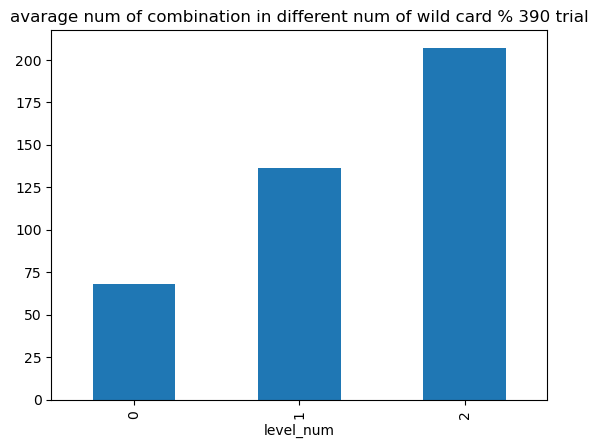

In [231]:
stat_df.groupby('level_num')['result_len'].mean().plot(kind='bar', 
                                                       title=f'avarage num of combination in different num of wild card % {int(3*iteration*len(ranks))} trial')

<Axes: title={'center': 'avarage num of combination in different num of wild card and rank % 390 trial'}, xlabel='level_card,level_num'>

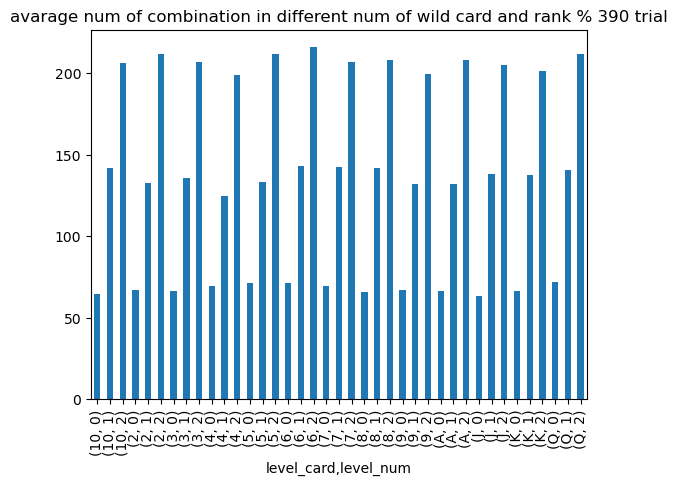

In [232]:
stat_df.groupby(['level_card', 'level_num'])['result_len'].mean().plot(kind='bar',
                                                                       title=f'avarage num of combination in different num of wild card and rank % {int(3*iteration*len(ranks))} trial')

### 代码迭代注意情况汇总

|     | 0张逢人配 | 1张逢人配                        | 2张逢人配                  |
| --- |:-----:|:----------------------------:|:----------------------:|
| 单张  | -     | -                            | -                      |
| 对子  | -     | 万能牌矩阵                        | 至少1张底牌                 |
| 三张  | -     | 万能牌矩阵                        | -                      |
| 炸弹  | -     | 万能牌矩阵                        | -                      |
| 王炸  | -     | -                            | -                      |
| 三带二 | 三张x对子 | 老三张x新对子<br/>新三张x老对子<br/>最后去重 | 新三张x新对子<br/>识别并去除AXXBX |
| 顺子  | 序列矩阵  | 新序列矩阵构造<br>老序列矩阵筛选           | -                      |
| 钢板  | 序列矩阵  | 新序列矩阵构造<br>老序列矩阵筛选           | -                      |
| 三连对 | 序列矩阵  | 新序列矩阵构造<br>老序列矩阵筛选           | -                      |
| 同花顺 | 序列矩阵  | 新序列矩阵构造<br>老序列矩阵筛选           | -                      |
